In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("training_log", "r") as f:
    lines = f.readlines()
    
lines = [x for x in lines if x.startswith("Epoch")]

In [3]:
epoch_list = [int(x.split("|")[0].split(" ")[1].split("/")[0]) for x in lines]
train_loss_list = [float(x.split("|")[1].split(":")[1].strip()) for x in lines]
val_loss_list = [float(x.split("|")[2].split(":")[1].strip()) for x in lines]
PSNR_list = [float(x.split("|")[3].split(":")[1].split(" ")[1]) for x in lines]
SSIM_list = [float(x.split("|")[4].split(":")[1].strip()) for x in lines]

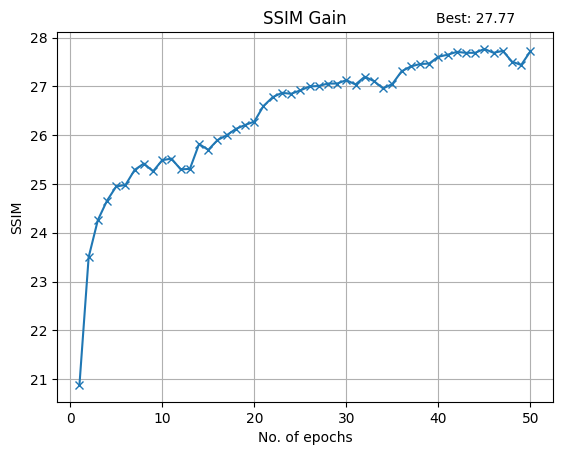

In [6]:
def plot_graph( y_data, y_label, title, 
               x_data=epoch_list, x_label="No. of epochs", label_best = False):
    plt.title(title)
    plt.plot(x_data, y_data, marker="x")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if label_best == True:
        best_epoch = np.argmax(y_data)
        plt.annotate(f"Best: {y_data[best_epoch]:.2f}", 
             (best_epoch, y_data[best_epoch]), 
             textcoords="offset points", xytext=(0,19), ha='center')
    plt.grid(True)
    plt.show()

plot_graph(y_data=PSNR_list, y_label="SSIM", title="SSIM Gain", label_best=True)

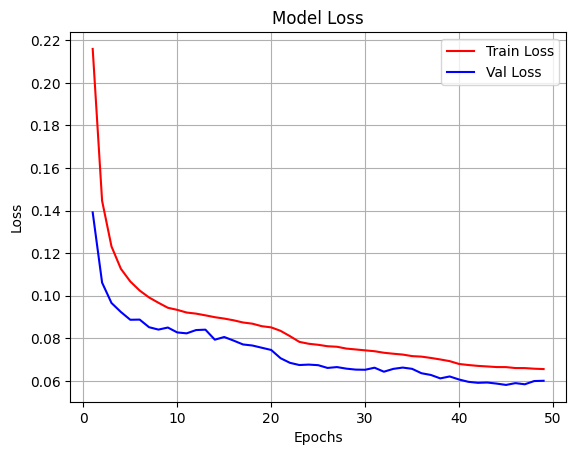

In [5]:
plt.title("Model Loss")
plt.plot(epoch_list, train_loss_list, color="r", label="Train Loss")
plt.plot(epoch_list, val_loss_list, color="b", label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()